
In diesem Skript wird ein Neuronales Netzwerk mit einem selbst erstelltem Datensatz von Straßenschildern angelernt. Anschließend wird dieses Modell in das TFLite Format konvertiert damit es für die Verwendung auf dem Raspberry Pi geeignet ist. Als Standart ist das SSD Mobielnet v2 ausgewählt, da dieses mit die besten Ergebnisse für Mobile anwendungen bringt. 
Um das Netzwerk weiter zu beschleunigen kann ein EdgeTPU verwendet werden. Dafür muss das TFLite Modell quantisiert werden und für den Coral Edge TPU kompiliert werden. Dieser Teil ist noch nicht funktionstüchtig und muss weiter bearbeitet werden.

#1. Einrichtung der Trainingsumgebung

## 1.1. Auswahl des Modell

Liste mit allen Vortrainierten Netzwerken die für Tensorflow Object-Detection-API verfügbar sind. Kennwerte zu den Netzwerken können [Tensorflow-GitHub](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md) entonmmen werden.


In [1]:
ALL_MODELS = {
'CenterNet HourGlass104 512x512' : 'http://download.tensorflow.org/models/object_detection/tf2/20200713/centernet_hg104_512x512_coco17_tpu-8.tar.gz',
'CenterNet HourGlass104 Keypoints 512x512' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_hg104_512x512_kpts_coco17_tpu-32.tar.gz',
'CenterNet HourGlass104 1024x1024' : 'http://download.tensorflow.org/models/object_detection/tf2/20200713/centernet_hg104_1024x1024_coco17_tpu-32.tar.gz',
'CenterNet HourGlass104 Keypoints 1024x1024' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_hg104_1024x1024_kpts_coco17_tpu-32.tar.gz',
'CenterNet Resnet50 V1 FPN 512x512' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet50_v1_fpn_512x512_coco17_tpu-8.tar.gz',
'CenterNet Resnet50 V1 FPN Keypoints 512x512' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet50_v1_fpn_512x512_kpts_coco17_tpu-8.tar.gz',
'CenterNet Resnet101 V1 FPN 512x512' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet101_v1_fpn_512x512_coco17_tpu-8.tar.gz',
'CenterNet Resnet50 V2 512x512' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet50_v2_512x512_coco17_tpu-8.tar.gz',
'CenterNet Resnet50 V2 Keypoints 512x512' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet50_v2_512x512_kpts_coco17_tpu-8.tar.gz',
'CenterNet MobileNetV2 FPN 512x512' : 'http://download.tensorflow.org/models/object_detection/tf2/20210210/centernet_mobilenetv2fpn_512x512_coco17_od.tar.gz',
'CenterNet MobileNetV2 FPN Keypoints 512x512' : 'http://download.tensorflow.org/models/object_detection/tf2/20210210/centernet_mobilenetv2fpn_512x512_coco17_kpts.tar.gz',
'EfficientDet D0 512x512' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz',
'EfficientDet D1 640x640' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d1_coco17_tpu-32.tar.gz',
'EfficientDet D2 768x768' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d2_coco17_tpu-32.tar.gz',
'EfficientDet D3 896x896' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d3_coco17_tpu-32.tar.gz',
'EfficientDet D4 1024x1024' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d4_coco17_tpu-32.tar.gz',
'EfficientDet D5 1280x1280' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d5_coco17_tpu-32.tar.gz',
'EfficientDet D6 1280x1280' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d6_coco17_tpu-32.tar.gz',
'EfficientDet D7 1536x1536' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d7_coco17_tpu-32.tar.gz',
'SSD MobileNet v2 320x320' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz',
'SSD MobileNet V1 FPN 640x640' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz',
'SSD MobileNet V2 FPNLite 320x320' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz',
'SSD MobileNet V2 FPNLite 640x640' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz',
'SSD ResNet50 V1 FPN 640x640 (RetinaNet50)' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz',
'SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_1024x1024_coco17_tpu-8.tar.gz',
'SSD ResNet101 V1 FPN 640x640 (RetinaNet101)' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8.tar.gz',
'SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8.tar.gz',
'SSD ResNet152 V1 FPN 640x640 (RetinaNet152)' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet152_v1_fpn_640x640_coco17_tpu-8.tar.gz',
'SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet152_v1_fpn_1024x1024_coco17_tpu-8.tar.gz',
'Faster R-CNN ResNet50 V1 640x640' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz',
'Faster R-CNN ResNet50 V1 1024x1024' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_1024x1024_coco17_tpu-8.tar.gz',
'Faster R-CNN ResNet50 V1 800x1333' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_800x1333_coco17_gpu-8.tar.gz',
'Faster R-CNN ResNet101 V1 640x640' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz',
'Faster R-CNN ResNet101 V1 1024x1024' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8.tar.gz',
'Faster R-CNN ResNet101 V1 800x1333' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_800x1333_coco17_gpu-8.tar.gz',
'Faster R-CNN ResNet152 V1 640x640' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet152_v1_640x640_coco17_tpu-8.tar.gz',
'Faster R-CNN ResNet152 V1 1024x1024' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet152_v1_1024x1024_coco17_tpu-8.tar.gz',
'Faster R-CNN ResNet152 V1 800x1333' : 'hhttp://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet152_v1_800x1333_coco17_gpu-8.tar.gz',
'Faster R-CNN Inception ResNet V2 640x640' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_640x640_coco17_tpu-8.tar.gz',
'Faster R-CNN Inception ResNet V2 1024x1024' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_inception_resnet_v2_1024x1024_coco17_tpu-8.tar.gz',
'Mask R-CNN Inception ResNet V2 1024x1024' : 'http://download.tensorflow.org/models/object_detection/tf2/20200711/mask_rcnn_inception_resnet_v2_1024x1024_coco17_gpu-8.tar.gz'
}

Auswahl des gewünschten Netzwerks aus der Dropdown-Liste, URL ist hinterlegt.

In [2]:
#@title Model Selection { display-mode: "form", run: "auto" }
model_display_name = 'SSD MobileNet V2 FPNLite 320x320' # @param ['CenterNet HourGlass104 512x512','CenterNet HourGlass104 Keypoints 512x512','CenterNet HourGlass104 1024x1024','CenterNet HourGlass104 Keypoints 1024x1024','CenterNet Resnet50 V1 FPN 512x512','CenterNet Resnet50 V1 FPN Keypoints 512x512','CenterNet Resnet101 V1 FPN 512x512','CenterNet Resnet50 V2 512x512','CenterNet Resnet50 V2 Keypoints 512x512','EfficientDet D0 512x512','EfficientDet D1 640x640','EfficientDet D2 768x768','EfficientDet D3 896x896','EfficientDet D4 1024x1024','EfficientDet D5 1280x1280','EfficientDet D6 1280x1280','EfficientDet D7 1536x1536','SSD MobileNet v2 320x320','SSD MobileNet V1 FPN 640x640','SSD MobileNet V2 FPNLite 320x320','SSD MobileNet V2 FPNLite 640x640','SSD ResNet50 V1 FPN 640x640 (RetinaNet50)','SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)','SSD ResNet101 V1 FPN 640x640 (RetinaNet101)','SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)','SSD ResNet152 V1 FPN 640x640 (RetinaNet152)','SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)','Faster R-CNN ResNet50 V1 640x640','Faster R-CNN ResNet50 V1 1024x1024','Faster R-CNN ResNet50 V1 800x1333','Faster R-CNN ResNet101 V1 640x640','Faster R-CNN ResNet101 V1 1024x1024','Faster R-CNN ResNet101 V1 800x1333','Faster R-CNN ResNet152 V1 640x640','Faster R-CNN ResNet152 V1 1024x1024','Faster R-CNN ResNet152 V1 800x1333','Faster R-CNN Inception ResNet V2 640x640','Faster R-CNN Inception ResNet V2 1024x1024','Mask R-CNN Inception ResNet V2 1024x1024']
model_handle = ALL_MODELS[model_display_name]
full_model_name = model_handle.split("/")[-1]
model_name = full_model_name.split(".")[0]
print('Selected model:'+ model_display_name)
print('Model URL: {}'.format(model_handle))

Selected model:SSD MobileNet V2 FPNLite 320x320
Model URL: http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz


## 1.2. Herunterladen der Trainingsdaten von Github

Donwload des GitHub Repositorys mit Trainings Bildern und benötigten Skripten

In [3]:
!git clone https://github.com/Fuchsi94/traffic-sign-training-data

Cloning into 'traffic-sign-training-data'...
remote: Enumerating objects: 509, done.
remote: Counting objects: 100% (509/509), done.
remote: Compressing objects: 100% (284/284), done.
remote: Total 509 (delta 238), reused 496 (delta 225), pack-reused 0
Receiving objects: 100% (509/509), 9.39 MiB | 20.00 MiB/s, done.
Resolving deltas: 100% (238/238), done.


## 1.3. Einbinden benötigter Bibliotheken

In [4]:
import os
import sys
import tensorflow as tf

## 1.4. Definierung von Ordner Strukturen

In dieser Zeile werden die Pfade zu den später benötigten Ordnern definiert. Im Anschluss wird die Ordner Struktur erstellt. Dies erleichtert die spätere Handhabung, da Daten in die jeweiligen Ordner einsortiert werden können.

In [37]:
CUSTOM_MODEL_NAME = 'my_ssd_mobilenet'
PRETRAINED_MODEL_NAME = model_name
PRETRAINED_MODEL_URL = model_handle
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'labelmap.pbtxt'

In [59]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'),
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [7]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

Erstellung aller vorher definierten Ordner anhand ihrer Pfade.

In [8]:
for path in paths.values():
    if not os.path.exists(path):
        !mkdir -p {path}

Kopieren der Trainingsdaten in die: eben erstellten Ordner

In [9]:
!cp -r /content/traffic-sign-training-data/test {paths['IMAGE_PATH']}
!cp -r /content/traffic-sign-training-data/train {paths['IMAGE_PATH']}
!cp -r /content/traffic-sign-training-data/evaluation_images {paths['IMAGE_PATH']}
!cp -r /content/traffic-sign-training-data/labelmap.pbtxt {paths['ANNOTATION_PATH']}

# 2. Installation der Tensorflow Object Detection (TFOD)

## 2.1. Download des Tensorflow model Repository

Download des Tensorflow GitHub Repositorys für die Object-Detection. Um Probleme mit neueren Versionen zu umgehen wird hier eine bestimmte Version ausgewählt.

In [10]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}
    #using a specific version of repo
    %cd '/content/Tensorflow/models'
    !git checkout -f e04dafd04d69053d3733bb91d47d0d95bc2c8199

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 68944, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 68944 (delta 50), reused 74 (delta 42), pack-reused 68860
Receiving objects: 100% (68944/68944), 577.22 MiB | 23.19 MiB/s, done.
Resolving deltas: 100% (48555/48555), done.
/content/Tensorflow/models
Note: checking out 'e04dafd04d69053d3733bb91d47d0d95bc2c8199'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at e04dafd04 Add copybara presumbit metadata, and move files to root dir.


## 2.1. Installation benötigter Software Bibliotheken

In [11]:
!apt-get install protobuf-compiler python-lxml python-pil
!pip install tf-slim lvis

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda

##2.2. Kompilieren der Protobuff Bibliothek
https://developers.google.com/protocol-buffers/docs/pythontutorial

In [12]:
#cd into 'TensorFlow/models/research'
%cd '/content/Tensorflow/models/research/'
!protoc object_detection/protos/*.proto --python_out=.


/content/Tensorflow/models/research


##2.3. Einfügen der System Pfade zur Pythonumgebung

In [13]:
os.environ['PYTHONPATH']+=":/content/Tensorflow/models"
sys.path.append("/content/Tensorflow/models")
os.environ['PYTHONPATH'] += ":/content/Tensorflow/models/research"
sys.path.append("/content/Tensorflow/models/research")

## 2.4. Konfiguration und Installation der Object-Detection

In [14]:
!python setup.py build
!python setup.py install

running build
running build_py
creating build
creating build/lib
creating build/lib/object_detection
copying object_detection/exporter_lib_tf2_test.py -> build/lib/object_detection
copying object_detection/model_lib_tf1_test.py -> build/lib/object_detection
copying object_detection/inputs_test.py -> build/lib/object_detection
copying object_detection/model_main.py -> build/lib/object_detection
copying object_detection/export_tflite_graph_lib_tf2_test.py -> build/lib/object_detection
copying object_detection/eval_util.py -> build/lib/object_detection
copying object_detection/exporter.py -> build/lib/object_detection
copying object_detection/exporter_main_v2.py -> build/lib/object_detection
copying object_detection/exporter_tf1_test.py -> build/lib/object_detection
copying object_detection/inputs.py -> build/lib/object_detection
copying object_detection/export_tflite_ssd_graph.py -> build/lib/object_detection
copying object_detection/exporter_lib_v2.py -> build/lib/object_detection
copyi

## 2.5. Validierung de Installation

Test der Installation. 


```
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_ssd_models_from_config): 28.32s
I1117 15:51:31.418292 140327634839424 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_create_ssd_models_from_config): 28.32s
[       OK ] ModelBuilderTF2Test.test_create_ssd_models_from_config
[ RUN      ] ModelBuilderTF2Test.test_invalid_faster_rcnn_batchnorm_update
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_invalid_faster_rcnn_batchnorm_update): 0.0s
I1117 15:51:31.425643 140327634839424 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_invalid_faster_rcnn_batchnorm_update): 0.0s
[       OK ] ModelBuilderTF2Test.test_invalid_faster_rcnn_batchnorm_update
[ RUN      ] ModelBuilderTF2Test.test_invalid_first_stage_nms_iou_threshold
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_invalid_first_stage_nms_iou_threshold): 0.0s
I1117 15:51:31.427677 140327634839424 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_invalid_first_stage_nms_iou_threshold): 0.0s
[       OK ] ModelBuilderTF2Test.test_invalid_first_stage_nms_iou_threshold
[ RUN      ] ModelBuilderTF2Test.test_invalid_model_config_proto
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_invalid_model_config_proto): 0.0s
I1117 15:51:31.428292 140327634839424 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_invalid_model_config_proto): 0.0s
[       OK ] ModelBuilderTF2Test.test_invalid_model_config_proto
[ RUN      ] ModelBuilderTF2Test.test_invalid_second_stage_batch_size
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_invalid_second_stage_batch_size): 0.0s
I1117 15:51:31.430018 140327634839424 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_invalid_second_stage_batch_size): 0.0s
[       OK ] ModelBuilderTF2Test.test_invalid_second_stage_batch_size
[ RUN      ] ModelBuilderTF2Test.test_session
[  SKIPPED ] ModelBuilderTF2Test.test_session
[ RUN      ] ModelBuilderTF2Test.test_unknown_faster_rcnn_feature_extractor
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_unknown_faster_rcnn_feature_extractor): 0.0s
I1117 15:51:31.431657 140327634839424 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_unknown_faster_rcnn_feature_extractor): 0.0s
[       OK ] ModelBuilderTF2Test.test_unknown_faster_rcnn_feature_extractor
[ RUN      ] ModelBuilderTF2Test.test_unknown_meta_architecture
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_unknown_meta_architecture): 0.0s
I1117 15:51:31.432176 140327634839424 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_unknown_meta_architecture): 0.0s
[       OK ] ModelBuilderTF2Test.test_unknown_meta_architecture
[ RUN      ] ModelBuilderTF2Test.test_unknown_ssd_feature_extractor
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_unknown_ssd_feature_extractor): 0.0s
I1117 15:51:31.433987 140327634839424 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_unknown_ssd_feature_extractor): 0.0s
[       OK ] ModelBuilderTF2Test.test_unknown_ssd_feature_extractor
----------------------------------------------------------------------
Ran 20 tests in 32.781s

OK (skipped=1)
```
Wenn die Ausgabe so aussieht wurde die TFODAPI erfolgreich installiert.

In [15]:
%cd /content
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}
# import Object Detection Dependencies
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
print('Installed successfully')

/content
2022-02-09 09:17:16.714461: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Running tests under Python 3.7.12: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model): 10.07s
I0209 09:17:26.792980 139743882712960 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_create_center_net_model): 10.07s
[       OK ] ModelBuilderTF2Test.test_create_center_net_model
[ RUN      ] ModelBuilderTF2Test.test_create_experimental_model
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_experimental_model): 0.0s
I0209 09:17:26.795608 139743882712960 test_util.py:2309] time(__main__.ModelBuilderTF2Test.test_create_experimental_model): 0.0s
[       OK ] ModelBuilderTF2Test.test_create_experimental_model
[ RUN      ] ModelBuilderTF2Test.test_create_faster_rcnn_from_config_with_crop_feature0 (Tr

Nun wird das definierte Modell heruntergeladen

In [16]:
%cd /content
if not os.path.isfile(os.path.join(paths['PRETRAINED_MODEL_PATH'], full_model_name)):
    !wget {model_handle}
    !mv {full_model_name} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {full_model_name}
else:
  print('model already exists')

/content
--2022-02-09 09:18:11--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.152.128, 2607:f8b0:4001:c56::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.152.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.08s   

2022-02-09 09:18:11 (235 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_c

#3. Erstellung der Labelmap und TFRecords Dateien

##3.1 Labelmap

In diesem Abschnitt wird die Labelmap erstellt. Entweder kann diese in der anschließenden Code Zelle erstellt werden oder in einem Editor. Die Syntax der Labelmap ist weiter unten gezeigt. Falls die Labelmap er Hand erstellt wird muss diese als labelmap.pbtxt abspeichabgespeichert werden und in den annotations Ordner hochgeladen werden.



```
item {
	name: "vorfahrt gewähren"
	id: 1
	display_name: "vorfahrt gewähren"
}
item {
	name: "rechts halten"
	id: 2
	display_name: "rechts halten"
}
item {
	name: "radfahrer"
	id: 3
	display_name: "radfahrer"

```



gewünschte Labels anpassen und Zelle ausführen

In [17]:
# labels = [{'name':'vorfahrt gewähren', 'id':1, 'display_name':'vorfahrt gewähren}, {'name':'rechts halten', 'id':2, 'display_name':'vorfahrt rechts halten}, {'name':'radfahrer', 'id':3, 'display_name':'radfahrer}]

# with open(files['LABELMAP'], 'w') as f:
#     for label in labels:
#         f.write('item { \n')
#         f.write('\tname:\'{}\'\n'.format(label['name']))
#         f.write('\tid:{}\n'.format(label['id']))
#         f.write('\tdiaplsy_name:\'{}\'\n'.format(label['display_name']))
#         f.write('}\n')

##3.2 Generate TFRecords File

In diesem Abschnitt wird die TF Records Datei erstellt.
https://www.tensorflow.org/tutorials/load_data/tfrecord

In [18]:
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [19]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !cp /content/traffic-sign-training-data/generate_tfrecord.py {paths['SCRIPTS_PATH']}

In [20]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

2022-02-09 09:18:16.274382: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
2022-02-09 09:18:21.411088: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# 4. Vorbereitung des Trainings

## 4.1. Vorbereitung der Konfigurations Datei

In [24]:
!cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], model_name, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
print("Done")

Done


In [22]:
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [25]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
config

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 },
 'eval_input_configs': [label_map_path: "PATH_TO_BE_CONFIGURED"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED"
 }
 ],
 'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.9969999790191

In [38]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [39]:
pipeline_config.model.ssd.num_classes = 12
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [41]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [42]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
config

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "Tensorflow/workspace/annotations/labelmap.pbtxt"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "Tensorflow/workspace/annotations/test.record"
 },
 'eval_input_configs': [label_map_path: "Tensorflow/workspace/annotations/labelmap.pbtxt"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "Tensorflow/workspace/annotations/test.record"
 }
 ],
 'model': ssd {
   num_classes: 12
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582

#5. Training und Evaluation

##5.1. Train the model

In [43]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [44]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=3000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobilenet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobilenet/pipeline.config --num_train_steps=3000


In [45]:
%cd /content/
!{command}

/content
2022-02-09 09:26:12.310928: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
W0209 09:26:12.313416 140174076577664 cross_device_ops.py:1387] There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0209 09:26:12.315016 140174076577664 mirrored_strategy.py:376] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 3000
I0209 09:26:12.322247 140174076577664 config_util.py:552] Maybe overwriting train_steps: 3000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0209 09:26:12.322575 140174076577664 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0209 09:26:12.362617 140174076577664 deprecation.py:347] From /c

##5.2. Evaluate the Model

In [ ]:
# command = "python {} --model_dir={} --eval_training_data=True --pipeline_config_path={} --checkpoint_dir={} --run_once=True".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [ ]:
# %cd /content/
# !{command}

#6. Ausfallsicherung

In diesem Abschnitt wird das trainierte Model mit seinen Checkpoints zwischengespeichert, falls ein Problem mit dem Notebook auftreten sollte. Hierfür muss das Notebook mit einem Google Drive Account verbunden werden und der Link abgeändert werden.
Alternativ kann man die Modell Checkpoints auch auf den lokalen Computer laden.

##6.1 Speichern der Model Checkpoints

In [ ]:
!cp -r /content/Tensorflow/workspace/models/my_ssd_mobnet /content/drive/MyDrive/Projekte/Self-Driving-Car/Software/Tensorflow-Object-Detection-API/TrainedModel

##6.2. Laden der Model Checkpoints

In [ ]:
!cp -r /content/drive/MyDrive/Projekte/Self-Driving-Car/Software/Tensorflow-Object-Detection-API/TrainedModel /content/Tensorflow/workspace/models/my_ssd_mobnet

##6.3. Load Train Model From Checkpoint

In [52]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [71]:
# Load pipeline config and build a detection model
%cd /content/
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

/content


In [72]:
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-4')).expect_partial()

In [73]:
@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 7. Bilderkennung

In [46]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [47]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [70]:
!ls {os.path.join(paths['IMAGE_PATH'], 'evaluation_images')}

IMG_5358.jpeg  IMG_5505.jpeg  IMG_5508.jpeg  IMG_5511.jpeg
IMG_5503.jpeg  IMG_5506.jpeg  IMG_5509.jpeg  IMG_5512.jpeg
IMG_5504.jpeg  IMG_5507.jpeg  IMG_5510.jpeg  IMG_5532.jpeg


In [104]:
EVAL_IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'evaluation_images', 'IMG_5504.jpeg')

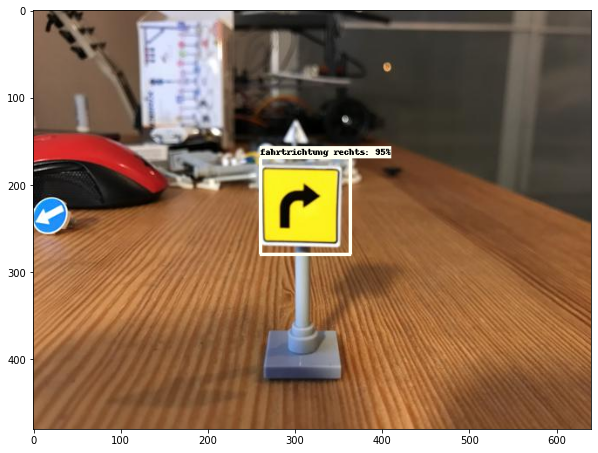

In [105]:
img = cv2.imread(EVAL_IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.6,
            agnostic_mode=False)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

#8. Exportierung des Models

##8.1. Freezing the Graph

Das Einfrieren ist gleichbedeutend mit dem Speichern eines Teils Ihres Modells für die nächste Verwendung.
Sie können das Training von hier aus fortsetzen, indem Sie Ihren Feinabstimmungsprüfpunkt zurücksetzen.

In [ ]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [ ]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [ ]:
!{command}

##8.2 Conversion to TFLite

https://www.tensorflow.org/lite/convert

TFLite ist ein weiteres Dateiformat, das für mobile Anwendungen oder Maschinen verwendet wird, auf denen keine Vollversion von Tensorflow Object Detection laufen kann, wie z.B. auf dem RaspberryPi.

In [ ]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [ ]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [ ]:
!{command}

In [ ]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [ ]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [ ]:
command

In [ ]:
!{command}

#9. Quantisierung
(Optional) Funktioniert nicht richtig.
In diesem Teil soll das TFLite Model quantisiert werden. Das wird benötigt um das Model auf dem Coral EdgeTPU laufen zu lassen. 

1https://coral.ai/docs/edgetpu/faq/#what-kind-of-real-world-performance-does-it-actually-provide

2https://coral.ai/docs/edgetpu/models-intro/#quantization

3https://www.tensorflow.org/model_optimization/guide/quantization/training

4https://www.tensorflow.org/lite/performance/post_training_quantization#full_integer_quantization

5https://towardsdatascience.com/quantize-your-deep-learning-model-to-run-on-an-npu-2900191757e5

6https://neuralet.com/article/quantization-of-tensorflow-object-detection-api-models

In [ ]:
!cp -r /content/drive/MyDrive/Projekte/Self-Driving-Car/Software/Tensorflow-Object-Detection-API/ExportedModels/my_ssd_mobnet/tfliteexport/saved_model /content

In [ ]:
import tensorflow as tf
saved_model_dir = '/content/saved_model'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

In [ ]:
#CONVERT YOUR MODEL TO TFLITE AND QUANTIZE TO INT8 
converter = tf.lite.TFLiteConverter.from_keras_model(pretrained_model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.experimental_new_converter = True

converter.target_spec.supported_types = [tf.int8]
converter.inference_input_type = tf.int8 
converter.inference_output_type = tf.int8 
quantized_tflite_model = converter.convert()

#SAVE THE QUANTIZED MODEL AS TFLITE FILE
open('quant_model.tflite' , "wb").write(quantized_tflite_model)

##9.2 Compile a model for the Edge TPU

In [ ]:
%env TFLITE_FILE=/content/drive/MyDrive/Projekte/Self-Driving-Car/Software/Tensorflow-Object-Detection-API/ExportedModels/my_ssd_mobnet/tfliteexport/saved_model/detect.tflite

##9.3 Get the Edge-TPU Compiler

https://coral.ai/docs/edgetpu/models-intro/#compatibility-overview
https://www.tensorflow.org/lite/performance/post_training_integer_quant
https://www.tensorflow.org/lite/performance/post_training_quantization

In [ ]:
! curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -

! echo "deb https://packages.cloud.google.com/apt coral-edgetpu-stable main" | sudo tee /etc/apt/sources.list.d/coral-edgetpu.list

! sudo apt-get update

! sudo apt-get install edgetpu-compiler	

##9.4 Compile the Model

In [ ]:
! edgetpu_compiler $TFLITE_FILE

##9.5 Save the model